157


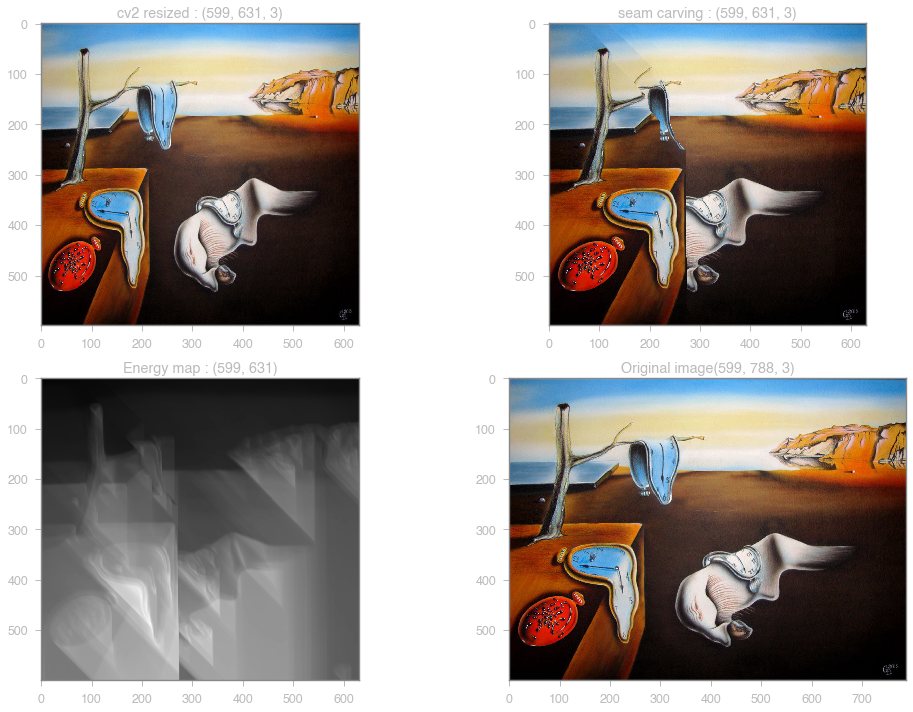

240


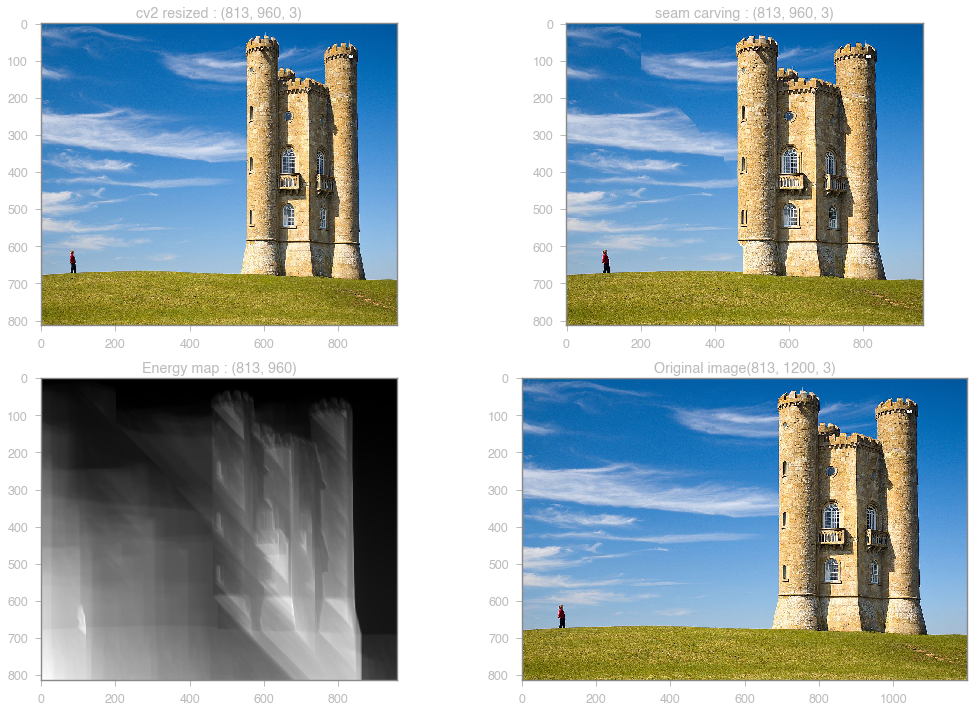

180


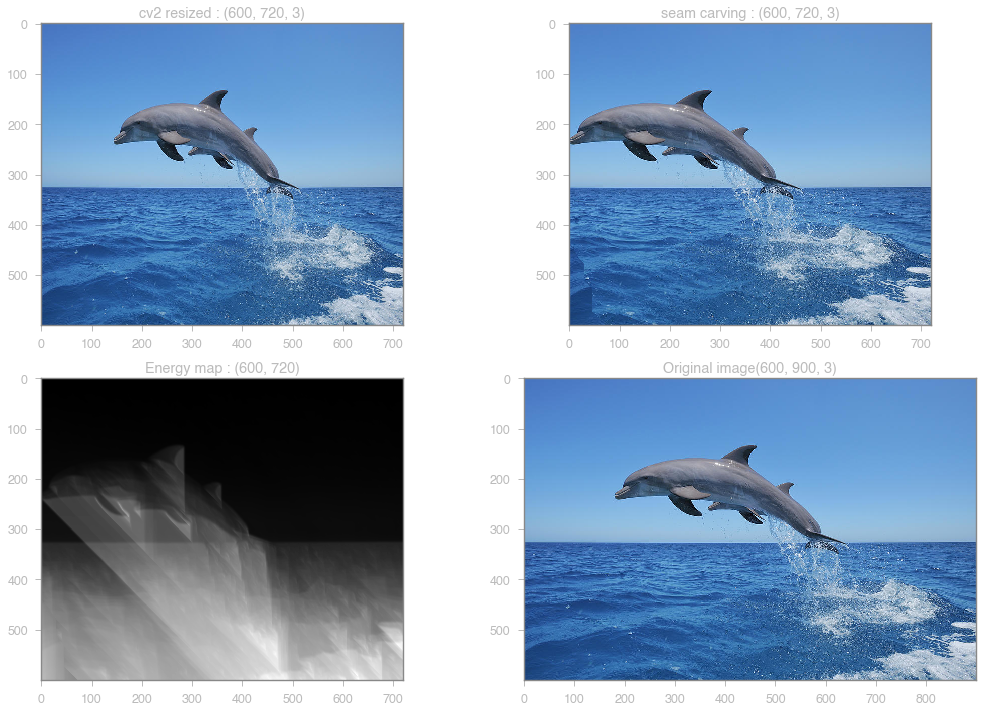

In [2]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
from ipywidgets import interact, widgets

img_names = ['paint.jpg', 'tower.jpg', 'dolphine.jpg']
kernel_size=11

def produce_emp(edge):
    h, w = edge.shape
    result_edge = np.zeros((h,w))
    result_edge[0,:] = edge[0,:]
    result_edge[-1,:] = edge[-1,:]
    for i in range(1, h):
        current = edge[i, :]
        next_ = edge[i, :]
        for j in range(w):
            left = max(0, j-1)
            right = min(j+1, w-1)
            result_edge[i, j] = np.min(result_edge[i-1, left:right] + next_[j])
    return result_edge


def find_seam(emp, start=400):
    h, w = emp.shape
    current = start
    result = [current]
    for i in range(h-2, -1, -1):
        left = max(0, current-1)
        right = min(current+1, w-1)
        current += np.argmin(emp[i, left:right]) - 1
        current = max(0, min(current, w-1))
        result.append(current)
    return np.array(result)


for img_name in img_names:
    plt.figure(figsize=(15,10))
    image = mpimg.imread(img_name)
    img_copy = np.copy(image)
    img_copy_ = np.copy(image)
    gray = cv2.cvtColor(img_copy, cv2.COLOR_RGB2GRAY).astype(np.float64)
    gray = cv2.GaussianBlur(gray, (kernel_size, kernel_size), 2)
    h, w, _ = image.shape
    num_reduce = w//5
    sobel_x = np.abs(cv2.Sobel(gray, 3, 1, 0)).astype(np.uint64)
    sobel_y = np.abs(cv2.Sobel(gray, 3, 0, 1)).astype(np.uint64)
    sobel = np.sqrt(sobel_x**2 + sobel_y**2).astype(np.uint32)
    emp = produce_emp(sobel)

    for i in range(num_reduce):
        result_img = np.zeros((h, w-1, 3), dtype=np.uint8)
#         start_index = np.random.randint(-5, -2, 1)[0]
#         start = np.argmin(emp[start_index, :])
#         start = np.random.randint(0, w-1, 1)[0]
        start = np.argmin(emp[-1, w//10:int(w*0.9)]) + w//10
        seam_index = find_seam(emp, start)
        emp_ = np.zeros((h, w-1), dtype=np.float64)

        for i in range(len(seam_index)):
            seam_ind = seam_index[i]
            result_img[h-(i+1), :seam_ind, :] = img_copy_[h-(i+1), :seam_ind, :]
            result_img[h-(i+1), seam_ind:, :] = img_copy_[h-(i+1), (seam_ind+1):, :]
            emp_[h-(i+1), :seam_ind] = emp[h-(i+1), :seam_ind]
            emp_[h-(i+1), seam_ind:] = emp[h-(i+1), (seam_ind+1):]

        img_copy_ = result_img
        emp = emp_
        height_index = [a for a in range(h-1, -1, -1)]
#         img_copy[height_index, seam_index, :] = [255, 0, 0]
        h, w, _ = result_img.shape
        
    print(num_reduce)
    h, w, _ = image.shape
    resized = cv2.resize(image, (w-num_reduce, h))

    plt.subplot(221);plt.imshow(resized);plt.title(f"cv2 resized : {resized.shape}")
    plt.subplot(222);plt.imshow(img_copy_);plt.title(f"seam carving : {img_copy_.shape}")
    plt.subplot(223);plt.imshow(emp, cmap='gray');plt.title(f"Energy map : {emp.shape}")
    plt.subplot(224);plt.imshow(image);plt.title(f"Original image{image.shape}")
    plt.tight_layout()
    plt.show()

In [ ]:
# Enlarge Image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
from ipywidgets import interact, widgets

img_names = ['paint.jpg', 'tower.jpg', 'dolphine.jpg']
kernel_size=11


def produce_emp(edge):
    h, w = edge.shape
    result_edge = np.zeros((h,w))
    result_edge[0,:] = edge[0,:]
    result_edge[-1,:] = edge[-1,:]
    for i in range(1, h-1):
        current = edge[i, :]
        next_ = edge[i, :]
        for j in range(w):
            left = max(0, j-1)
            right = min(j+1, w-1)
            result_edge[i, j] = np.min(result_edge[i-1, left:right] + next_[j])
    return result_edge


def find_seam(emp, start=400):
    h, w = emp.shape
    current = start
    result = [current]
    for i in range(h-2, -1, -1):
        left = max(0, current-1)
        right = min(current+1, w-1)
        current += np.argmin(emp[i, left:right]) - 1
        current = max(0, min(current, w-1))
        result.append(current)

    return np.array(result)


for img_name in img_names:
    image = mpimg.imread(img_name)
    img_copy = np.copy(image)
    img_copy_ = np.copy(image)
    gray = cv2.cvtColor(img_copy, cv2.COLOR_RGB2GRAY).astype(np.float64)
    gray = cv2.GaussianBlur(gray, (kernel_size, kernel_size), 2)
    h, w, _ = image.shape
    num_append = w//5

    sobel_x = np.abs(cv2.Sobel(gray, 3, 1, 0)).astype(np.uint64)
    sobel_y = np.abs(cv2.Sobel(gray, 3, 0, 1)).astype(np.uint64)
    sobel = np.sqrt(sobel_x**2 + sobel_y**2).astype(np.uint32)
    emp = produce_emp(sobel)
    emp = (emp/np.max(emp))*255
    emp = emp.astype(np.uint8)

    for i in range(num_append):
        result_img = np.zeros((h, w+1, 3), dtype=np.uint8)
    #         start = np.random.randint(0, w-i, 1)[0]
        rand = np.random.randint(-30, -3, 1)
        start = np.argmin(emp[rand, :])
        seam_index = find_seam(emp, start)
        emp_ = np.zeros((h, w+1), dtype=np.uint8)

        for i in range(len(seam_index)):
            seam_ind = seam_index[i]
            result_img[h-(i+1), :seam_ind, :] = img_copy_[h-(i+1), :seam_ind, :]
            result_img[h-(i+1), seam_ind, :] = img_copy_[h-(i+1), seam_ind, :]
            result_img[h-(i+1), (seam_ind+1):, :] = img_copy_[h-(i+1), seam_ind:, :]
            emp_[h-(i+1), :seam_ind] = emp[h-(i+1), :seam_ind]
            emp_[h-(i+1), seam_ind] = emp[h-(i+1), seam_ind]
            emp_[h-(i+1), (seam_ind+1):] = emp[h-(i+1), seam_ind:]

        img_copy_ = result_img
        emp = emp_
        height_index = [a for a in range(h-1, -1, -1)]
#         img_copy[height_index, seam_index-1, :] = [255, 0, 0]
        h, w, _ = result_img.shape

    print(num_append)
    h, w, _ = image.shape
    resized = cv2.resize(image, (w+num_append, h))
    plt.figure(figsize=(15,10))
    plt.subplot(221);plt.imshow(resized);plt.title(f"CV : Resized : {resized.shape}")
    plt.subplot(222);plt.imshow(img_copy_);plt.title(f"Seam Carving : {img_copy_.shape}")
    plt.subplot(223);plt.imshow(emp, cmap='gray');plt.title(f"Energy map : {emp.shape}")
    plt.subplot(224);plt.imshow(img_copy);plt.title(f"original Image : {img_copy.shape}")
    plt.tight_layout()
    plt.show()

In [ ]:
a = np.array([125, 125]).astype(np.uint8)
print(a)

In [ ]:
a**2